# importing libraries 

In [158]:
# Data manipulation
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", None)
 
# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Deep Learning
import tensorflow as tf

from typing import Dict, List, Tuple, Sequence

# creating the data frame

In [159]:
price_df = pd.read_csv('/home/marcnaweb/code/marcnaweb/car_recommendation_engine/raw_data/car_prices_w_prices_scaled.csv', index_col=0)

price_df = pd.read_csv('/home/marcnaweb/code/marcnaweb/car_recommendation_engine/raw_data/car_prices_w_prices_scaled.csv', index_col=0)

In [160]:
price_df

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year,Price_sd_scaled
373016,371,Volkswagen,Polo 1.6,2003,19,1.346345,1.022858,0.979539,2022,2.004089
373017,372,Ford,Fiesta Supercharger 1.0,2003,19,1.138171,1.052518,0.979539,2022,-0.039959
373021,376,Audi,S3 1.8 Turbo Quattro,2003,19,1.097381,1.095261,0.979539,2022,-0.440472
373022,377,Alfa Romeo,156 2.5 V6,2003,19,1.411365,0.990306,0.979539,2022,2.642515
373023,379,Volkswagen,Parati Tour 2.0,2003,19,1.166472,0.936489,0.979539,2022,0.237928
...,...,...,...,...,...,...,...,...,...,...
385,398,Fiat,Stilo Abarth 2.4 20V,2003,1,0.943185,0.898591,0.917069,2004,1.639149
426,441,Audi,A8 4.2 V8 Quattro,2003,1,0.749652,0.961737,0.917069,2004,-0.836267
427,442,Land Rover,Range Rover HSE 4.4 V8,2003,1,0.753798,0.862201,0.917069,2004,-0.783237
20753,53,Volvo,S60 T5 2.3,2001,2,0.781296,1.090581,0.916243,2003,0.000000


<AxesSubplot:xlabel='Year', ylabel='Count'>

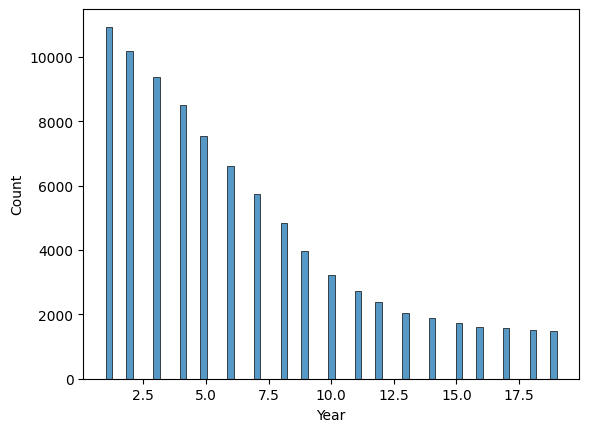

In [161]:
sns.histplot(data=price_df, x="Year")

<AxesSubplot:xlabel='calendar_year', ylabel='Count'>

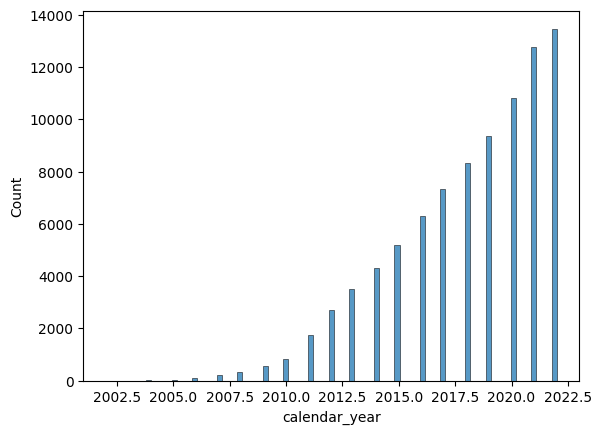

In [162]:
sns.histplot(data=price_df, x="calendar_year")

In [163]:
price_df.groupby("calendar_year").count()["car_code"]

calendar_year
2002        1
2003        1
2004        5
2005        9
2006      108
2007      195
2008      331
2009      555
2010      839
2011     1730
2012     2695
2013     3507
2014     4315
2015     5203
2016     6295
2017     7348
2018     8315
2019     9352
2020    10828
2021    12785
2022    13474
Name: car_code, dtype: int64

In [164]:
price_df["car_model"].nunique()

4761

In [165]:
price_df["Year"].mean()

6.40951860827616

*we have 4761 car models, tracked during 20 years for about 6,4 years*

<AxesSubplot:xlabel='Year', ylabel='Count'>

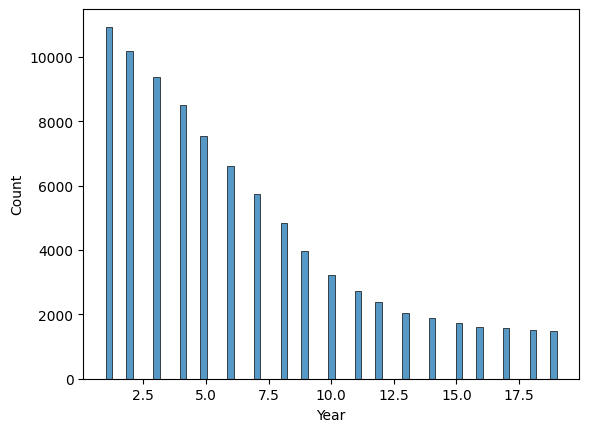

In [166]:
sns.histplot(data=price_df, x="Year")

*we will use 3 years/observations as an input to predict the next year*: we have enough observations "past" / "future" observation for it

In [167]:
order_price_df = price_df.sort_values(["car_code","Year"] )
order_price_df.drop(columns=["Price_sd_scaled"], inplace=True)
order_price_df.drop(columns=["Next_YoY_Pr_Pred"], inplace=True)

In [168]:
order_price_df["prev_1_Price_YoY"] = order_price_df.sort_values(["car_code","Year"] ).groupby('car_code')["Price_YoY"].shift(1)

order_price_df["prev_2_Price_YoY"] = order_price_df.sort_values(["car_code","Year"] ).groupby('car_code')["Price_YoY"].shift(2)


order_price_df = order_price_df[order_price_df["prev_1_Price_YoY"].isnull() == False]
order_price_df = order_price_df[order_price_df["prev_2_Price_YoY"].isnull() == False]

order_price_df[order_price_df["car_code"] == 5123]




,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,calendar_year,prev_1_Price_YoY,prev_2_Price_YoY
46408,5123,Chevrolet,Classic Advantage 1.0,2015,3,0.957665,0.936641,2018,0.938800,0.724582
67111,5123,Chevrolet,Classic Advantage 1.0,2015,4,0.936641,0.943042,2019,0.957665,0.938800
87814,5123,Chevrolet,Classic Advantage 1.0,2015,5,0.943042,0.898867,2020,0.936641,0.957665
108517,5123,Chevrolet,Classic Advantage 1.0,2015,6,0.898867,1.205907,2021,0.943042,0.936641
129220,5123,Chevrolet,Classic Advantage 1.0,2015,7,1.205907,0.975592,2022,0.898867,0.943042


In [169]:

order_price_df[order_price_df["car_code"] == 5123]



,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,calendar_year,prev_1_Price_YoY,prev_2_Price_YoY
46408,5123,Chevrolet,Classic Advantage 1.0,2015,3,0.957665,0.936641,2018,0.938800,0.724582
67111,5123,Chevrolet,Classic Advantage 1.0,2015,4,0.936641,0.943042,2019,0.957665,0.938800
87814,5123,Chevrolet,Classic Advantage 1.0,2015,5,0.943042,0.898867,2020,0.936641,0.957665
108517,5123,Chevrolet,Classic Advantage 1.0,2015,6,0.898867,1.205907,2021,0.943042,0.936641
129220,5123,Chevrolet,Classic Advantage 1.0,2015,7,1.205907,0.975592,2022,0.898867,0.943042


,prev_2_Price_YoY,prev_1_Price_YoY,Price_YoY,Next_YoY_Price
227734,0.904178,0.852240,0.907692,0.879982
248437,0.852240,0.907692,0.879982,0.904896
269140,0.907692,0.879982,0.904896,0.928763
289843,0.879982,0.904896,0.928763,1.000050
310546,0.904896,0.928763,1.000050,0.938794
...,...,...,...,...
82475,0.967577,1.220987,0.963152,0.968071
61773,0.877204,0.781956,1.075859,0.960412
82476,0.781956,1.075859,0.960412,0.952021
61775,0.785524,0.943683,1.135969,0.956587


# Creating X Y 

In [175]:
Xy = order_price_df[["prev_2_Price_YoY",  "prev_1_Price_YoY", "Price_YoY", "Next_YoY_Price" ]]
Xy

,prev_2_Price_YoY,prev_1_Price_YoY,Price_YoY,Next_YoY_Price
227734,0.904178,0.852240,0.907692,0.879982
248437,0.852240,0.907692,0.879982,0.904896
269140,0.907692,0.879982,0.904896,0.928763
289843,0.879982,0.904896,0.928763,1.000050
310546,0.904896,0.928763,1.000050,0.938794
...,...,...,...,...
82475,0.967577,1.220987,0.963152,0.968071
61773,0.877204,0.781956,1.075859,0.960412
82476,0.781956,1.075859,0.960412,0.952021
61775,0.785524,0.943683,1.135969,0.956587


In [176]:
X = order_price_df[["prev_2_Price_YoY",  "prev_1_Price_YoY", "Price_YoY" ]]
y = order_price_df[["Next_YoY_Price"]]

In [177]:
from sklearn.model_selection import train_test_split


# Split data into train, test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)


In [188]:
X_train.shape

(42051, 3)

# creating the model

In [213]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Normalization

def init_model(X_train, y_train):
        
    normalizer = Normalization()
    normalizer.adapt(X_train)
 
    model = models.Sequential()
    #model.add(normalizer)
    #model.add(layers.LSTM(5, activation='tanh', return_sequences = False ))
    model.add(layers.Dense(3, activation='linear'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer='adam', metrics=["mae"])
    
    return model

In [214]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

In [215]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

model = init_model(X_train, y_train)

es = EarlyStopping(patience = 5,restore_best_weights = True)

history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size = 32,
                    epochs = 100,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/100
920/920 [==============================] - 14s 13ms/step - loss: 0.0423 - mae: 0.1408 - val_loss: 0.0180 - val_mae: 0.1027
Epoch 2/100
920/920 [==============================] - 11s 12ms/step - loss: 0.0169 - mae: 0.0977 - val_loss: 0.0154 - val_mae: 0.0911
Epoch 3/100
920/920 [==============================] - 12s 13ms/step - loss: 0.0150 - mae: 0.0908 - val_loss: 0.0142 - val_mae: 0.0893
Epoch 4/100
920/920 [==============================] - 10s 11ms/step - loss: 0.0139 - mae: 0.0868 - val_loss: 0.0134 - val_mae: 0.0823
Epoch 5/100
920/920 [==============================] - 12s 13ms/step - loss: 0.0133 - mae: 0.0845 - val_loss: 0.0130 - val_mae: 0.0800
Epoch 6/100
920/920 [==============================] - 14s 15ms/step - loss: 0.0130 - mae: 0.0831 - val_loss: 0.0128 - val_mae: 0.0794
Epoch 7/100
920/920 [==============================] - 11s 11ms/step - loss: 0.0128 - mae: 0.0823 - val_loss: 0.0127 - val_mae: 0.0781
Epoch 8/100
920/920 [==============================] - 

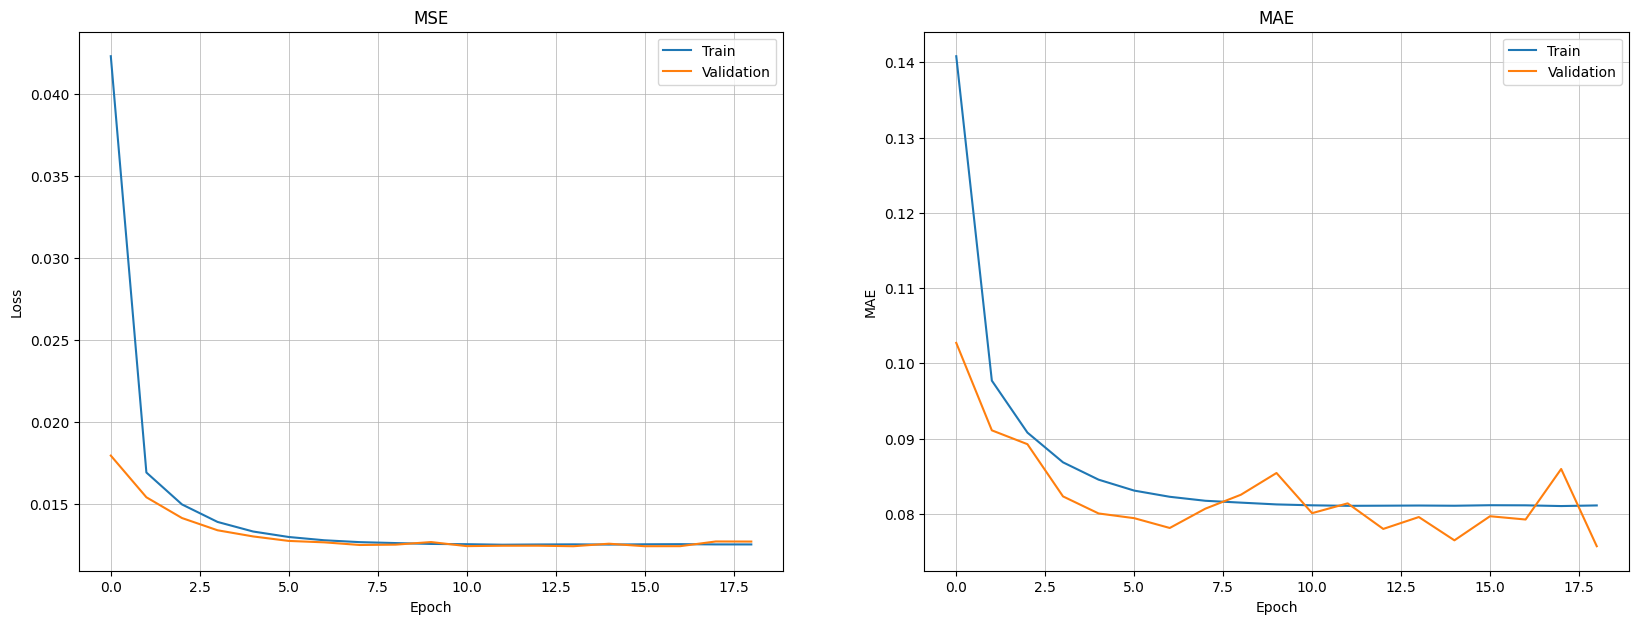

In [216]:
plot_history(history);

In [218]:
from sklearn.metrics import mean_squared_error

In [221]:
y_pred = model.predict(X_test)
y_pred

564/564 [==============================] - 4s 7ms/step


array([[0.92501295],
       [0.9776392 ],
       [0.9865672 ],
       ...,
       [0.98768514],
       [0.9683252 ],
       [0.93039757]], dtype=float32)

In [222]:
mean_squared_error(y_test, y_pred) ** (0.5)   #model score: mean square error --> lower is better

0.1118996608427176

In [223]:
mean_squared_error(y_test, [y_test.mean()]*len(y_test)) ** (0.5)   #naive score: mean square error

0.11464276867602484